## Coronary Heart Disease Prediction ~ classification
### Renana Rimon

![title](heart12.jpg)
from IPython.display import Image
Image("heart12.jpg")

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from random import randrange

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.preprocessing import binarize
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

## project target: 

predict the ten year risk of getting *coronary heart disease*, 
given the other parameters (last column).

## features:

$\underline {demographic} $
1. male: *0 = male, 1 = female*. (nomial)
2. age: the patient age. (continiuous)
3. education: the patient education. (nomial)

$\underline {Behavioral}$
4. currentSmoker: whether or not the patient is a current smoker. (nomial)
5. cigsPerDay: the average number of cigarettes the patient smokes per day. (continiuous)

$\underline {medical (history)}$ (nomial)
6. BPMeds: blood pressure medication.
7. prevalentStroke: had stroke in the past.
8. prevalentHyp: high blood pressure.
9. diabetes:whether or not the patient had diabetes

$\underline {medical (current)}$ (Continuous)
10. totChol: total cholesterol level
   * *recommended value - less then 200.*
11. sysBP: systolic blood pressure
   * *recommended value - 120.*
12. diaBP: diastolic blood pressure
   * *recommended value - 80.*
13. BMI: Body Mass Index 
   * *0-18.5: under weight* 
   * *18.5-25: normal*
   * *25+: over weight*
14. heartRate: heart rate
   * *recommended value - 60-80.*
15. glucose: glucose level
   * *recommended value - 70-100.*

$\underline {Predict variable}$
16. TenYearCHD: 10 year risk of coronary heart disease. 

**~ in general unless otherwise stated: 0 = NO, 1 = YES ~**

In [2]:
df = pd.read_csv('framingham.csv')
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


In [3]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [4]:
df.tail()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0


In [5]:
df.shape

(4238, 16)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


###  **NaN** values - find & handle

In [7]:
df.isnull().sum().sort_values(ascending=False)

glucose            388
education          105
BPMeds              53
totChol             50
cigsPerDay          29
BMI                 19
heartRate            1
TenYearCHD           0
diaBP                0
sysBP                0
diabetes             0
prevalentHyp         0
prevalentStroke      0
currentSmoker        0
age                  0
male                 0
dtype: int64

In [8]:
# calcuate the precentage to understand the impact of the NaN on the data set
total_sum = df.isnull().sum().sort_values(ascending=False)
percentage = (total_sum/df.isnull().count())*100
df1 = pd.concat([total_sum, percentage], axis=1, keys=['total_sum', 'percentage'])
df2 = df1[df1['total_sum']>0]
df2

,total_sum,percentage
glucose,388,9.155262
education,105,2.477584
BPMeds,53,1.250590
totChol,50,1.179802
cigsPerDay,29,0.684285
BMI,19,0.448325
heartRate,1,0.023596


In [9]:
#fill 'glucose' with mean
df['glucose'].fillna(df['glucose'].mean(), inplace=True) 

#fill 'education' with random values - only 2.4%, not a big impact.
df['education'].fillna(randrange(1,5), inplace=True) 

#fill 'totChol' with mean
df['totChol'].fillna(df['totChol'].mean(), inplace=True)

#fill 'cigsPerDay' with median - the mean can be biased incorrectly.
df['cigsPerDay'].fillna(df['cigsPerDay'].median(), inplace=True) 

#drop from data set the 'BPMeds', 'BMI' and 'heartRate': minimize amount, can not fill with other values.
df = df.dropna() 
df.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [10]:
df.shape

(4165, 16)

### Data distribution 

<ipython-input-11-a75f9ba3613a>:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  df.hist(ax = ax1)


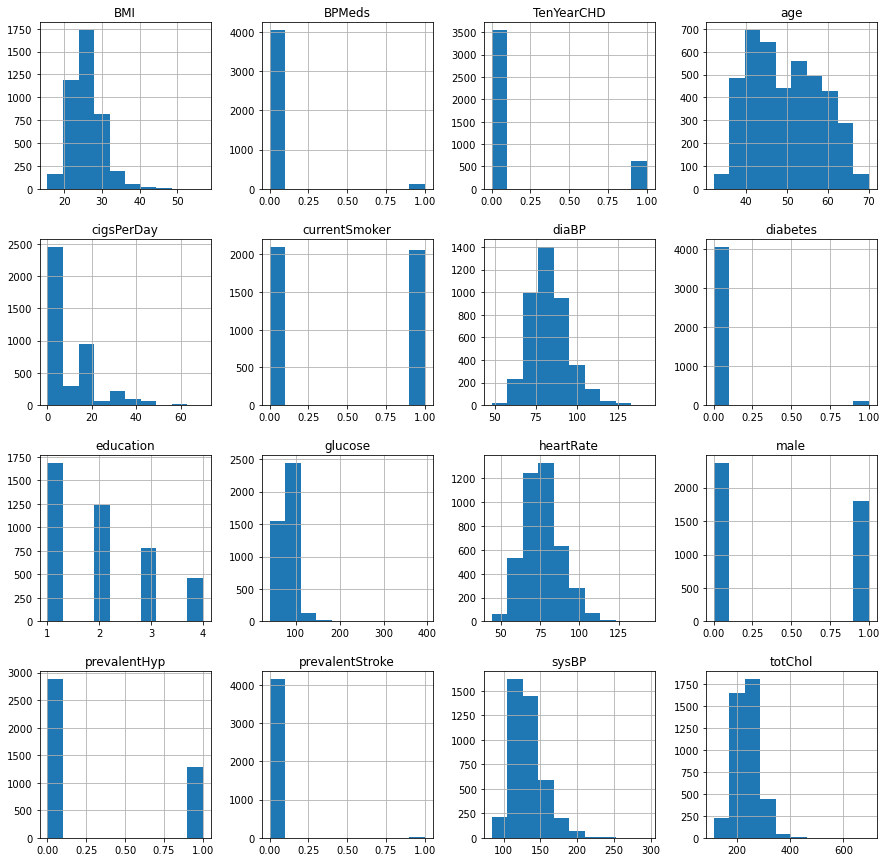

In [11]:
# plot histogram to see the distribution of the data
fig = plt.figure(figsize = (15,15))
ax1 = fig.gca() # Get the current axes
df.hist(ax = ax1)
plt.show()

### outliers - find & remove from df ###

from the histograms it can be seen in which feature there can be a state of *outliers*, <br>
and these cases will be examined.
(only features with outliers found are displayed)

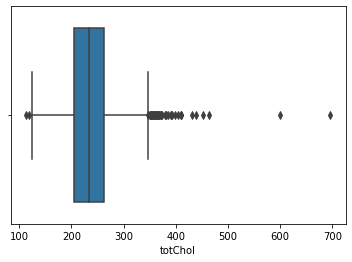

In [12]:
sns.boxplot(df.totChol)

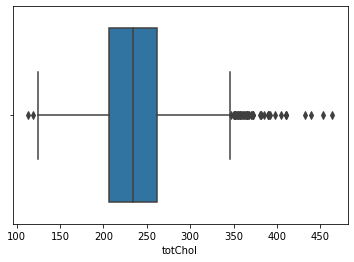

In [13]:
#Dropping 2 outliers in cholesterin
df = df.drop(df[df.totChol > 599].index)
sns.boxplot(df.totChol)

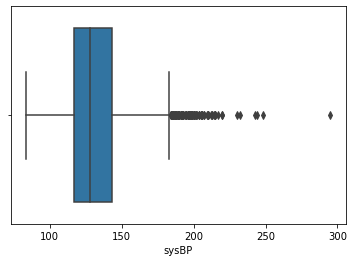

In [14]:
sns.boxplot(df.sysBP)

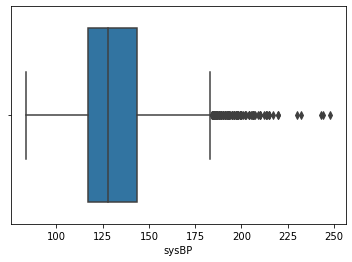

In [15]:
#Dropping 1 outlier in sysBP
df = df.drop(df[df.sysBP > 280].index)
sns.boxplot(df.sysBP)

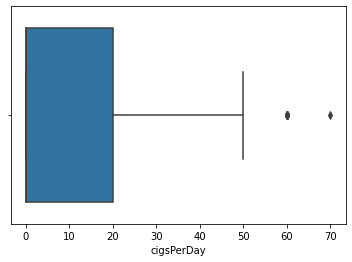

In [16]:
sns.boxplot(df.cigsPerDay)

although there are outliers in 'cigsPerDay', I decided not to remove them,  
because in this case the amount of cigarettes has a big impact and the exception is possible.

In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
male,4162.0,0.431764,0.495381,0.00,0.00,0.0,1.00,1.0
age,4162.0,49.518020,8.539448,32.00,42.00,49.0,56.00,70.0
education,4162.0,2.006247,1.019144,1.00,1.00,2.0,3.00,4.0
currentSmoker,4162.0,0.495435,0.500039,0.00,0.00,0.0,1.00,1.0
cigsPerDay,4162.0,8.968044,11.911683,0.00,0.00,0.0,20.00,70.0
BPMeds,4162.0,0.029553,0.169371,0.00,0.00,0.0,0.00,1.0
prevalentStroke,4162.0,0.005286,0.072521,0.00,0.00,0.0,0.00,1.0
prevalentHyp,4162.0,0.308265,0.461832,0.00,0.00,0.0,1.00,1.0
diabetes,4162.0,0.024988,0.156107,0.00,0.00,0.0,0.00,1.0
totChol,4162.0,236.531628,43.308573,113.00,206.00,234.0,262.00,464.0


In [18]:
#the probability to be in 10 years CHD risk
CHD_risk0 = df.loc[df['TenYearCHD'].isin(['0'])]
CHD_risk0_pre = (3543/4165)*100
print("NOT in risk of CHD:", len(CHD_risk0.axes[0]), "people\n*precenage:", round(CHD_risk0_pre,4), "%")

CHD_risk1 = df.loc[df['TenYearCHD'].isin(['1'])]
CHD_risk1_pre = (622/4165)*100
print("in risk of CHD:", len(CHD_risk1.axes[0]), "people\n*precenage:", round(CHD_risk1_pre,4), "%")

NOT in risk of CHD: 3542 people
*precenage: 85.066 %
in risk of CHD: 620 people
*precenage: 14.934 %


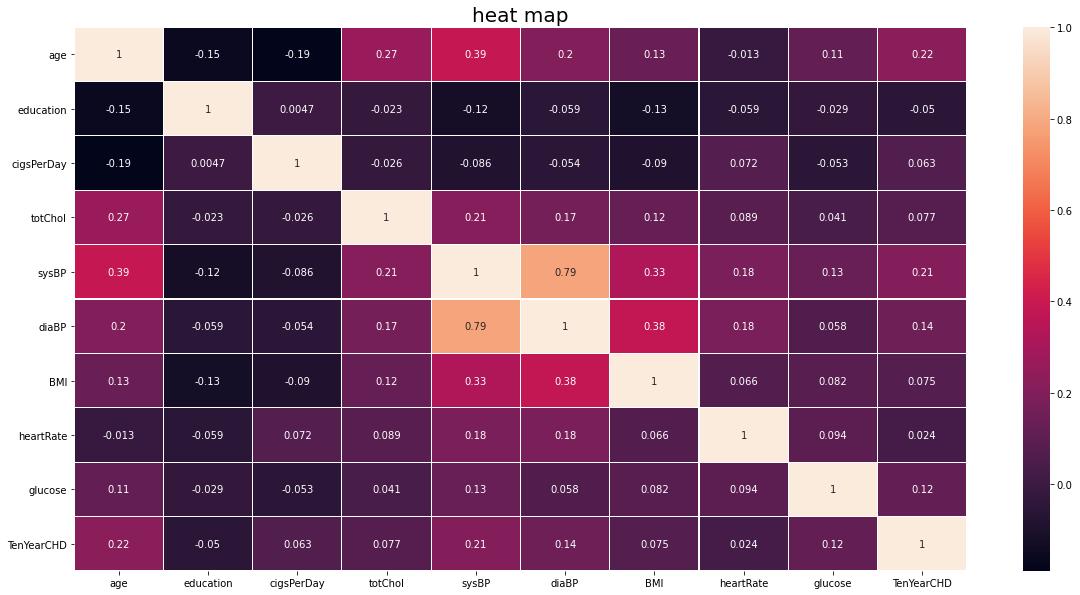

In [19]:
plt.figure(figsize=(20,10))
plt.title('heat map',fontsize=20)
df5 = df.drop(['male', 'currentSmoker', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes'],axis=1)
sns.heatmap(df5.corr(),linewidths=0.1,annot=True)
plt.show()

### Observations
as it can be seen, correlation between featurs to target is very low. <br>
the highest correlation to target is 'sysBP' and 'age'.

**high correlation:**
   * sysBP & diaBP (0.79)
   * sysBP & age
   * diaBP & BMI

### correlation between each feature and TenYearCHD 

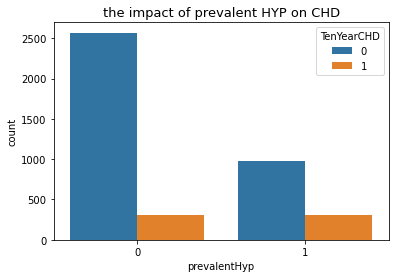

In [20]:
plt.title('the impact of prevalent HYP on CHD',fontsize=13)
sns.countplot(x=df['prevalentHyp'], hue=df['TenYearCHD'])

**Observations:** Higher percentage of people having hypertension suffer from CHD

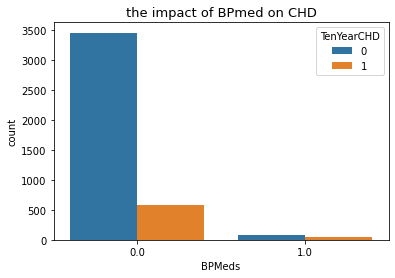

In [21]:
plt.title('the impact of BPmed on CHD',fontsize=13)
sns.countplot(x='BPMeds',data=df,hue='TenYearCHD')

**Observations:** approximately 50% of patients taking BP meds suffer from CHD

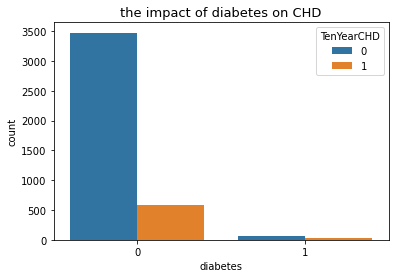

In [22]:
plt.title('the impact of diabetes on CHD',fontsize=13)
sns.countplot(x='diabetes',data=df,hue='TenYearCHD')

**Observations:** approximately 60-80% of diabetic patients get CHD

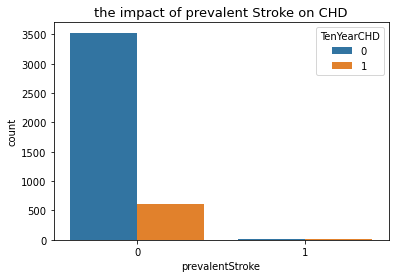

In [23]:
plt.title('the impact of prevalent Stroke on CHD',fontsize=13)
sns.countplot(x='prevalentStroke',data=df,hue='TenYearCHD')

**Observations:** approximately 90% of stroke patients get CHD

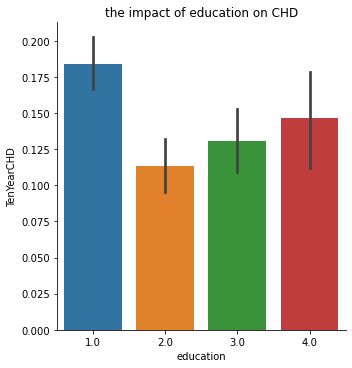

In [24]:
sns.catplot(x="education", y="TenYearCHD", kind="bar", data=df).set(title = 'the impact of education on CHD')

#### Observations: 
* People with the lowest education(1) are more likely to get CHD.
* from (2) to (4) it seems to be the opposite - 
  people with higher education are more likely to get CHD.


[Text(0.5, 1.0, 'the effect of currentSmoker on the chance of CHD in relation to age')]

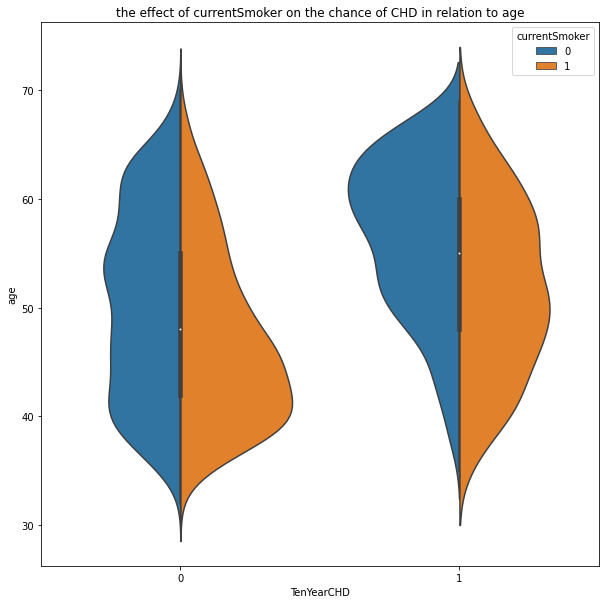

In [25]:
plt.figure(figsize=(10,10))
sns.violinplot(x='TenYearCHD', y='age', data=df, hue='currentSmoker', split=True).set(title = 'the effect of currentSmoker on the chance of CHD in relation to age')

#### Observations:
   * most smokers having risk are in age around 50 years
   * most of non-smokers having risk are in age around 60-70 years
  

In [26]:
total = df.groupby(['male', 'currentSmoker']).size()
percentage = (total/df.groupby(['male']).size())*100
df1 = pd.concat([total, percentage], axis=1, keys=['total', 'percentage'])
df2 = df1[df1['total']>0]
df2

total  percentage
male currentSmoker                   
0    0               1393   58.900634
     1                972   41.099366
1    0                707   39.343350
     1               1090   60.656650

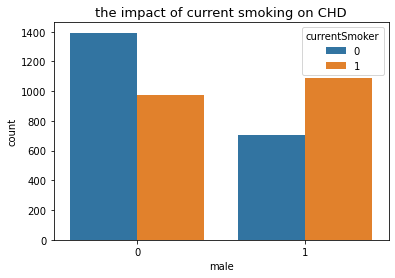

In [27]:
plt.title('the impact of current smoking on CHD',fontsize=13)
sns.countplot(x=df['male'], hue=df['currentSmoker'])

In [28]:
total = df.groupby(['male', 'TenYearCHD']).size()
percentage = (total/df.groupby(['male']).size())*100
df1 = pd.concat([total, percentage], axis=1, keys=['total', 'percentage'])
df3 = df1[df1['total']>0]
df3

total  percentage
male TenYearCHD                   
0    0            2083   88.076110
     1             282   11.923890
1    0            1459   81.190874
     1             338   18.809126

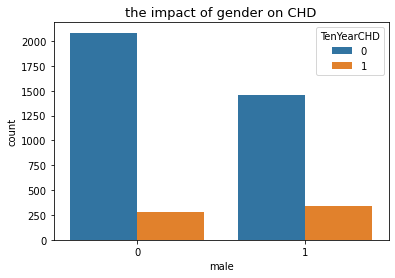

In [29]:
plt.title('the impact of gender on CHD',fontsize=13)
sns.countplot(x=df['male'], hue=df['TenYearCHD'])

In [30]:
total = df.groupby(['currentSmoker', 'TenYearCHD']).size()
percentage = (total/df.groupby(['currentSmoker']).size())*100
df1 = pd.concat([total, percentage], axis=1, keys=['total', 'percentage'])
df4 = df1[df1['total']>0]
df4

total  percentage
currentSmoker TenYearCHD                   
0             0            1805   85.952381
              1             295   14.047619
1             0            1737   84.238603
              1             325   15.761397

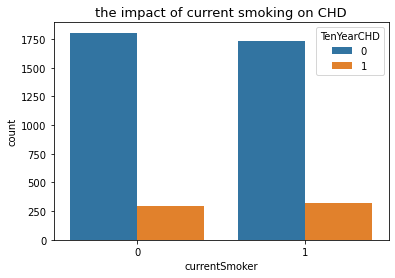

In [31]:
plt.title('the impact of current smoking on CHD',fontsize=13)
sns.countplot(x=df['currentSmoker'], hue=df['TenYearCHD'])

#### Observations:
The last 3 tables and 3 plots is trying to make more accurate review. <br>
although female appear to be more likely to get CHD, <br>
it can be seen that there is a higher percentage of female that are current smokers, <br>
which can affect the percentage of female who get CHD.

   * 40% from male are current smokers, 60% from female.
   * 12% from male have 10 years risk of CHD, 18% from female.
   * 14.5% from **not** current smokers have 10 years risk of CHD, 16% from current smokers.
   
   
after we saw that the effect of the currentSmokers is not significantly(14.5% -16%), <br>
it can be seen that the main effect is in the **amount of cigarettes**. <br>
In the next graph we can see the 'cigsPerDay' impact.<br>
The classes is approximately according to a standard pack of cigarettes (25).   

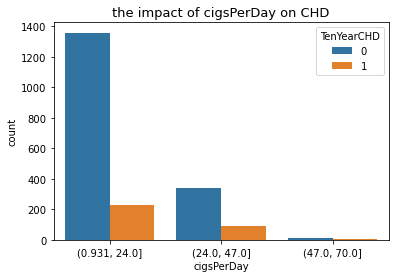

In [32]:
category_cigs1 = df.drop(df[df.cigsPerDay < 1].index) #drop the not smokers
category_cigs = pd.cut(category_cigs1['cigsPerDay'], 3) #divide to 3 classes

plt.title('the impact of cigsPerDay on CHD',fontsize=13)
sns.countplot(x=category_cigs, hue=category_cigs1['TenYearCHD'])

#### Observations:
   * less than 1 pack per day: ~15%
   * 1-2 packs per day: ~25%
   * 2+ packs per day: ~50%

### Feature Selection
Feature selection is a technique where we choose those features in our data <br> that contribute most to the target variable, the best predictors for the target variable. <br>
'SelectKBest' is identify the features with the most importance for the outcome variable Heart Disease

In [33]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


X = df.iloc[:,0:15]  
y = df.iloc[:,-1] #predicted feature - TenYearCHD   

bestfeatures = SelectKBest(score_func=chi2, k=10)

fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['feature','Score']  
featureScores.nlargest(15,'Score')

,feature,Score
10,sysBP,656.879102
14,glucose,353.288003
1,age,294.905927
4,cigsPerDay,260.293536
9,totChol,195.447631
11,diaBP,147.811519
7,prevalentHyp,85.424932
8,diabetes,31.897292
5,BPMeds,30.134243
0,male,21.697406


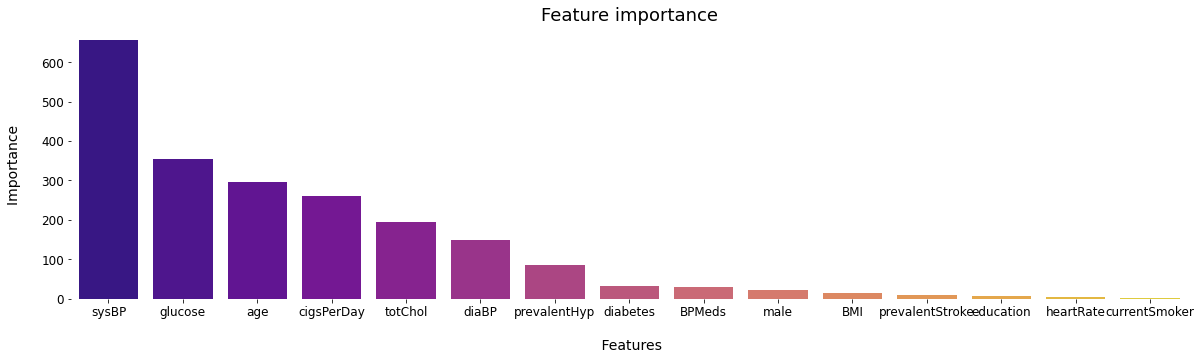

In [34]:
featureScores = featureScores.sort_values(by='Score', ascending=False)
plt.figure(figsize=(20,5))
sns.barplot(x='feature', y='Score', data=featureScores, palette = "plasma")
plt.box(False)
plt.title('Feature importance', fontsize=18)
plt.xlabel('\n Features', fontsize=14)
plt.ylabel('Importance \n', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


### create new Data Frame with selected fitures
selecting the 11 **most impactful** features for the target variable, <br>
 remove 4 **less impactful** features: prevalentStroke, education, heartRate, currentSmoker.

In [35]:
new_df = df[['male','age','cigsPerDay','BPMeds','prevalentHyp','diabetes','totChol','sysBP','diaBP', 'BMI', 'glucose',
         'TenYearCHD']]
new_df

,male,age,cigsPerDay,BPMeds,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,glucose,TenYearCHD
0,1,39,0.0,0.0,0,0,195.0,106.0,70.0,26.97,77.000000,0
1,0,46,0.0,0.0,0,0,250.0,121.0,81.0,28.73,76.000000,0
2,1,48,20.0,0.0,0,0,245.0,127.5,80.0,25.34,70.000000,0
3,0,61,30.0,0.0,1,0,225.0,150.0,95.0,28.58,103.000000,1
4,0,46,23.0,0.0,0,0,285.0,130.0,84.0,23.10,85.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4232,1,68,0.0,0.0,1,0,176.0,168.0,97.0,23.14,79.000000,1
4233,1,50,1.0,0.0,1,0,313.0,179.0,92.0,25.97,86.000000,1
4234,1,51,43.0,0.0,0,0,207.0,126.5,80.0,19.71,68.000000,0
4236,0,44,15.0,0.0,0,0,210.0,126.5,87.0,19.16,81.966753,0


### compare new_df & original df

In [36]:
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.000000,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.000000,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.000000,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.000000,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4232,1,68,1.0,0,0.0,0.0,0,1,0,176.0,168.0,97.0,23.14,60.0,79.000000,1
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.000000,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.000000,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,81.966753,0


In [37]:
print("new_df shape: ", new_df.shape, "original df shape: ", df.shape)

new_df shape:  (4162, 12) original df shape:  (4162, 16)


# Model Building
## Feature Scaling
the range of all features should be normalized so that each feature contributes approximately proportionately to the final distance. <br>
scaling by 'MinMaxScaler': $x' = \frac {x - min(x)}{max(x) - min(x)} $ <br> (x' = normalized value)



In [38]:
scaler = MinMaxScaler(feature_range=(0,1)) 
scaled_df= pd.DataFrame(scaler.fit_transform(new_df), columns=new_df.columns)

In [39]:
#df after scaling [0-1]
scaled_df.describe()

,male,age,cigsPerDay,BPMeds,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,glucose,TenYearCHD
count,4162.000000,4162.000000,4162.000000,4162.000000,4162.000000,4162.000000,4162.000000,4162.000000,4162.000000,4162.000000,4162.000000,4162.000000
mean,0.431764,0.461001,0.128115,0.029553,0.308265,0.024988,0.351942,0.296109,0.369133,0.248679,0.118415,0.148967
std,0.495381,0.224722,0.170167,0.169371,0.461832,0.156107,0.123386,0.132325,0.125382,0.098717,0.064127,0.356099
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.263158,0.000000,0.000000,0.000000,0.000000,0.264957,0.203647,0.285714,0.182501,0.090395,0.000000
50%,0.000000,0.447368,0.000000,0.000000,0.000000,0.000000,0.344729,0.270517,0.359788,0.238972,0.112994,0.000000
75%,1.000000,0.631579,0.285714,0.000000,1.000000,0.000000,0.424501,0.364742,0.439153,0.302957,0.127119,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [40]:
#df before scaling
new_df.describe()

,male,age,cigsPerDay,BPMeds,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,glucose,TenYearCHD
count,4162.000000,4162.000000,4162.000000,4162.000000,4162.000000,4162.000000,4162.000000,4162.000000,4162.000000,4162.000000,4162.000000,4162.000000
mean,0.431764,49.518020,8.968044,0.029553,0.308265,0.024988,236.531628,132.209995,82.883109,25.800481,81.918869,0.148967
std,0.495381,8.539448,11.911683,0.169371,0.461832,0.156107,43.308573,21.767387,11.848630,4.073083,22.700785,0.356099
min,0.000000,32.000000,0.000000,0.000000,0.000000,0.000000,113.000000,83.500000,48.000000,15.540000,40.000000,0.000000
25%,0.000000,42.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,72.000000,0.000000
50%,0.000000,49.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,80.000000,0.000000
75%,1.000000,56.000000,20.000000,0.000000,1.000000,0.000000,262.000000,143.500000,89.500000,28.040000,85.000000,0.000000
max,1.000000,70.000000,70.000000,1.000000,1.000000,1.000000,464.000000,248.000000,142.500000,56.800000,394.000000,1.000000


## Train & Test

### reminder: the precentage of '0' is 85% while the precentage of '1' is 15%.
therefore, the accuracy of the dummy classifier is 85%, so it is hard to be more accurate.<br>
We will therefore emphasize that our goal is **to predict more TP than the dummy, that will always predict N.**

In [41]:
y = scaled_df['TenYearCHD'] #target
x = scaled_df.drop(['TenYearCHD'], axis = 1) #df without target

# divide: train(70%), test(30%)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=29)
print("x_train:", x_train.shape, "x_test:", x_test.shape, "y_train:", y_train.shape, "y_test:", y_test.shape)

x_train: (2913, 11) x_test: (1249, 11) y_train: (2913,) y_test: (1249,)


**Model Evaluation**
   * **Accuracy:** Overall, how often is the classifier correct? <br>
   $ Accuracy = \frac{(TP + TN)}{total} $
   * **f1 score:** The F1 score can be interpreted as a weighted average of the precision and recall [0-1].
   * **Precision score:** When it predicts yes, how often is it correct?<br> 
   $ Precision = \frac {TP}{predicted T}$
   * **recall score:** TP Rate(Sensitivity or Recall): When it’s actually yes, how often does it predict yes? <br>
   $ recall = \frac{TP}{TP+FP} $

In [42]:
def cReport(y_test, y_pred):
    acc = accuracy_score(y_test, y_pred)
    print(f" * accuracy: {round(acc,3)*100}%")

    f1 = f1_score(y_test, y_pred)
    print(f" * f1 score: {round(f1,3)*100}%")

    precision = precision_score(y_test, y_pred)
    print(f" * precision: {round(precision,3)*100}%")

    recall = recall_score(y_test, y_pred)
    print(f" * recall: {round(recall,3)*100}%")

## #Model_1 - Logistic Regression ##
In logistic regression, the dependent variable is a binary variable that contains data coded as *1 = CHD risk, 0 = NOT in CHD risk*. <br>In other words, the logistic regression model predicts P(Y=1) as a function of X.

In [43]:
# initialize model
logReg = LogisticRegression()

# fit model
logReg.fit(x_train, y_train)

# prediction - predict probability
logReg_pred_prob = logReg.predict_proba(x_test)[:5]
print("predict probability: \n",logReg_pred_prob)

# predict
logReg_pred = logReg.predict(x_test)
print("\nprediction: \n",logReg_pred)

predict probability: 
 [[0.48937145 0.51062855]
 [0.94919079 0.05080921]
 [0.95589599 0.04410401]
 [0.92368389 0.07631611]
 [0.94037475 0.05962525]]

prediction: 
 [1. 0. 0. ... 0. 0. 0.]


In [44]:
confusion = metrics.confusion_matrix(y_test, logReg_pred)
print("confusion matrix:\n",confusion) 

confusion matrix:
 [[1058    3]
 [ 180    8]]


In [45]:
cReport(y_test, logReg_pred)

 * accuracy: 85.3%
 * f1 score: 8.0%
 * precision: 72.7%
 * recall: 4.3%


In [46]:
# 10-fold cross-validation
scores = cross_val_score(logReg, x, y, cv=10, scoring='accuracy')
print("cross validation scores:\n",scores)
# use mean accuracy as an estimate of out-of-sample accuracy
print("\ncv score mean:", round(scores.mean(),4))

cross validation scores:
 [0.85131894 0.85851319 0.85576923 0.86298077 0.84615385 0.85576923
 0.86538462 0.85336538 0.85817308 0.85096154]

cv score mean: 0.8558


### Threshold

In [47]:
y_pred_prob = logReg.predict_proba(x_test)[:, 1]

# change threshold
y_pred_class = binarize([y_pred_prob], 0.3)[0]

print("\ny predict probability: \n",y_pred_prob[0:10])

print("\ny prediction: \n",y_pred_class[0:10])


y predict probability: 
 [0.51062855 0.05080921 0.04410401 0.07631611 0.05962525 0.03735451
 0.03482552 0.23413987 0.13467892 0.06196643]

y prediction: 
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


C:\Users\PC\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass threshold=0.3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [48]:
cReport(y_test, y_pred_class)

 * accuracy: 82.5%
 * f1 score: 30.5%
 * precision: 37.8%
 * recall: 25.5%


In [49]:
confusion = metrics.confusion_matrix(y_test, y_pred_class)
print("confusion matrix:\n",confusion)

confusion matrix:
 [[982  79]
 [140  48]]


**~ althought accuracy after changing the threshold is less, We would prefer the accuracy to be lower in order to get more TP ~**

## #Model_2 - KNN (k-nearest neighbors) ## 

In [50]:
# initialize model
knn = KNeighborsClassifier(n_neighbors = 5)

# fit model
knn.fit(x_train, y_train)

# prediction - predict probability
knn_pred_prob = knn.predict_proba(x_test)[:5]
print("predict probability: \n",knn_pred_prob)

knn_pred = knn.predict(x_test)
print("\nprediction: \n",knn_pred)

predict probability: 
 [[0.6 0.4]
 [0.6 0.4]
 [1.  0. ]
 [0.8 0.2]
 [0.6 0.4]]

prediction: 
 [0. 0. 0. ... 0. 0. 0.]


In [51]:
confusion = metrics.confusion_matrix(y_test, knn_pred)
print("confusion matrix:\n",confusion) 

confusion matrix:
 [[1032   29]
 [ 171   17]]


In [52]:
cReport(y_test, knn_pred)

 * accuracy: 84.0%
 * f1 score: 14.499999999999998%
 * precision: 37.0%
 * recall: 9.0%


### Threshold

In [53]:
y_pred_prob_knn = knn.predict_proba(x_test)[:, 1]

# treshold
y_pred_class1 = binarize([y_pred_prob_knn], 0.3)[0]

print("\ny predict probability: \n",y_pred_prob_knn[0:10])

print("\ny prediction: \n",y_pred_class1[0:10])


y predict probability: 
 [0.4 0.4 0.  0.2 0.4 0.2 0.2 0.2 0.  0. ]

y prediction: 
 [1. 1. 0. 0. 1. 0. 0. 0. 0. 0.]


C:\Users\PC\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass threshold=0.3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [54]:
cReport(y_test, y_pred_class1)

 * accuracy: 79.3%
 * f1 score: 32.800000000000004%
 * precision: 32.1%
 * recall: 33.5%


In [55]:
confusion = metrics.confusion_matrix(y_test, y_pred_class1)
print("confusion matrix:\n",confusion)

confusion matrix:
 [[928 133]
 [125  63]]


In [56]:
# 10-fold cross-validation with K=5 for KNN
scores1 = cross_val_score(knn, x, y, cv=10, scoring='accuracy')
print("cross validation scores:\n",scores)
# use mean accuracy as an estimate of out-of-sample accuracy
print("\ncv score mean:", round(scores1.mean(),4))

cross validation scores:
 [0.85131894 0.85851319 0.85576923 0.86298077 0.84615385 0.85576923
 0.86538462 0.85336538 0.85817308 0.85096154]

cv score mean: 0.8359


### observations:
after seen the 2 models prefornences, we will continue with **Logistic Regression** model, <br>
this is because of the weighting of the results that are important to us, especially accuracy and TP. 

therefore, we will focus it in the next steps.

## Confusion matrix

Text(0.5, 1.1, 'Confusion matrix Logistic Regression\n')

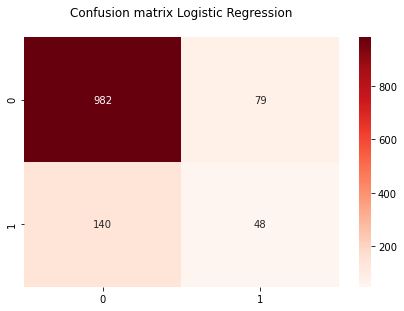

In [57]:
cnf_matrix_logReg = confusion_matrix(y_test, y_pred_class)

sns.heatmap(pd.DataFrame(cnf_matrix_logReg), annot=True,cmap="Reds" , fmt='g')
plt.tight_layout()
plt.title('Confusion matrix Logistic Regression\n', y=1.1)

 **TN** = 982,  **FN** = 140,  **FP** = 79, **TP** = 48        
 
 
 ## ROC CURVE LOGISTIC REGRESSION
 

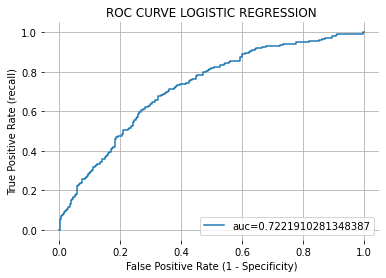

The score for the AUC ROC Curve is: 72.2%


In [58]:
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
auc = roc_auc_score(y_test, y_pred_prob)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.box(False)
plt.title ('ROC CURVE LOGISTIC REGRESSION')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (recall)')
plt.grid(True)
plt.show()

print(f"The score for the AUC ROC Curve is: {round(auc,3)*100}%")

$ FPR =\frac{FP}{N} =\frac{FP}{FP + TN}$  ,  $ TPR =\frac{TP}{P} =\frac{TP}{TP + FN}$

In [59]:
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(x_train, y_train)
dum = dummy_clf.predict(x_test)
print("dummy classifier:", round(dummy_clf.score(x_test, y_test),4))

dummy classifier: 0.8495


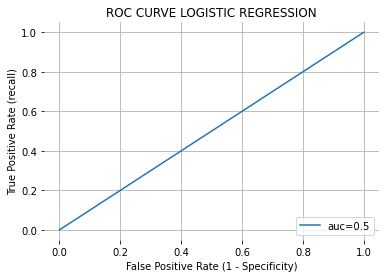

The score for the AUC ROC Curve is: 50.0%


In [60]:
fpr, tpr, _ = roc_curve(y_test, dum)
auc = roc_auc_score(y_test, dum)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.box(False)
plt.title ('ROC CURVE LOGISTIC REGRESSION')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (recall)')
plt.grid(True)
plt.show()

print(f"The score for the AUC ROC Curve is: {round(auc,3)*100}%")

Text(0.5, 1.1, 'Confusion matrix dummy classifier\n')

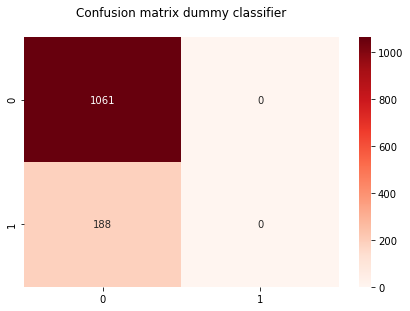

In [61]:
cnf_matrix_logReg = confusion_matrix(y_test, dum)

sns.heatmap(pd.DataFrame(cnf_matrix_logReg), annot=True,cmap="Reds" , fmt='g')
plt.tight_layout()
plt.title('Confusion matrix dummy classifier\n', y=1.1)

## CONCLUSION:

#### FINAL RESULT : <br>
**Logistic Regression** model is the recommended model - depending on the requirement, the model gave the best results.
1. Accuracy: 82.5%
2. f1 score: 30.5%
3. Precision: 37.8%
4. Recall: 25.5%
5. TP: 48, TN: 982

**Dummy classifier:** 
1. Accuracy: 84% 
2. TP: 0, TN: 1061

**Data:** <br>
1. *Age* is directly proportional to the target variable (TenYearCHD)
2. *Number of cigs per day* is a major factor for predicting the heart disease.
3. *Diabetic* patients those having higher level of *glucose* ranging from 200-400, have **higher** risk of getting CHD.
4. 90% of *stroke* patients get CHD.
5. Patients who have higher *systole BP* have higher chances of getting CHD.
6. Patients whose *diastole BP* is around 75-80 are mostly safe.